### Kütüphanelerin Yüklenmesi ve Görselleştirme Ayarlarının Yapılandırılması

Bu bölümde, veri analizi ve görselleştirme süreçlerinde kullanılacak temel Python kütüphaneleri projeye dahil edilmiştir. Her kütüphane, veri işleme sürecinin farklı bir aşamasında önemli roller üstlenir:

- `pandas`: Veri setlerini okumak, düzenlemek ve analiz etmek için kullanılır. Tablo yapısındaki veriler üzerinde hızlı ve etkili işlemler yapılmasını sağlar.
- `numpy`: Sayısal hesaplamalar ve çok boyutlu diziler üzerinde işlem yapma imkânı sunar. Veri manipülasyonunda temel bir araçtır.
- `seaborn`: İstatistiksel grafikleri kolayca oluşturmayı sağlayan bir görselleştirme kütüphanesidir. Veri dağılımları, ilişkiler ve kategorik karşılaştırmalar için güçlü araçlara sahiptir.
- `matplotlib.pyplot`: Temel grafik çizim işlemleri için kullanılır ve çoğu görselleştirmenin altında çalışan temel yapıyı oluşturur.
- `os`, `glob`, `re`: Dosya işlemleri ve regex işlemleri için kullanılır. Özellikle veri dosyalarının otomatik seçimi gibi görevlerde yardımcı olur.

Kod içerisinde ek olarak bazı yapılandırmalar gerçekleştirilmiştir:

- `pd.set_option('display.max_columns', None)`: Veri setindeki tüm sütunların eksiksiz görüntülenmesini sağlar. Çok sayıda sütuna sahip veri setleriyle çalışırken analiz sürecini kolaylaştırır.
- `sns.set_theme(style="whitegrid", palette="crest")`: Seaborn grafiklerinin varsayılan tema ve renk paletini belirler. Bu sayede tüm grafikler tutarlı bir görünüm kazanır.
- `palette = sns.color_palette("crest", as_cmap=True)`: Aynı renk temasının bazı sürekli renk haritalarında da kullanılabilmesini sağlar.
- `plt.rcParams['figure.figsize'] = (10, 6)`: Grafiklerin varsayılan boyutunu ayarlar, böylece görselleştirmelerin okunabilirliği artar.

Ayrıca, çalışma sırasında çok fazla uyarı mesajı üretiliyorsa isteğe bağlı olarak şu satır aktif edilebilir:

```python
# warnings.filterwarnings('ignore')

In [1]:
import os
import glob
import re
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Uyarıları devre dışı bırakmak istersen açabilirsin:
# import warnings
# warnings.filterwarnings('ignore')

# Tüm sütunları göster
pd.set_option('display.max_columns', None)

# Grafik stilini ayarlayalım (isteğe bağlı)
sns.set_theme(style="whitegrid", palette="crest")
palette = sns.color_palette("crest", as_cmap=True)
plt.rcParams['figure.figsize'] = (10, 6)

### Veri Dosyasının Yüklenmesi ve Temizlenmesi

`../data/raw/` klasöründeki `HB_Details_*.csv` formatındaki dosyalar taranarak en son oluşturulan dosya otomatik olarak yüklenmiştir. Bu işlem sayesinde her çalıştırmada manuel olarak dosya adı belirtmeye gerek kalmaz.

Veri seti `hb_df` olarak yüklendikten sonra `df` değişkenine kopyalanmış ve analizlerde kullanılmak üzere düzenlenmiştir. Veri setinden analizde ihtiyaç duyulmayan `Başlık`, `Çekilme Zamanı` ve `Link` sütunları çıkarılmıştır.

Kod sonunda `df.shape` komutu ile veri setindeki satır ve sütun sayısı görüntülenmiştir.

In [2]:
# Klasördeki tüm Hepsiburada detay dosyalarını bul
file_list = glob.glob('../data/raw/HB_Details_*.csv')

# En son tarihli dosyayı seç
latest_file = max(file_list, key=os.path.getctime)

# Dosyayı oku
hb_df = pd.read_csv(latest_file)
df = hb_df.copy()

# Gereksiz sütunları sil
df.drop(['Başlık', 'Çekilme Zamanı', 'Link'], axis=1, inplace=True)

# Veri boyutunu göster
df.shape

(1793, 24)

In [3]:
df.sample(3)

,Marka,Kullanım Amacı,Renk,Cihaz Ağırlığı,İşlemci Tipi,İşlemci,İşlemci Nesli,İşlemci Çekirdek Sayısı,Maksimum İşlemci Hızı,Ram (Sistem Belleği),Ram Tipi,Ekran Kartı,Ekran Kartı Tipi,Ekran Kartı Hafızası,Ekran Kartı Bellek Tipi,SSD Kapasitesi,Harddisk Kapasitesi,Ekran Boyutu,Max Ekran Çözünürlüğü,Ekran Özelliği,Ekran Yenileme Hızı,Ekran Panel Tipi,İşletim Sistemi,Fiyat (TRY)
1417,Asus,NaN,Gri,2 - 4 kg,Intel Core i7,Intel Core i7,12.Nesil,NaN,"4,7 GHz",24 GB,DDR4,Belirtilmemiş,Dahili Ekran Kartı,Paylaşımlı,Onboard,1 TB,Yok,"15,6 inç",1920 x 1080,NaN,NaN,IPS,Windows 11 Pro,35.999 TL
890,Lenovo,Ofis ve İş,"Siyah, Siyah",2 kg ve Altı,Intel Core Ultra 7,155H,Intel Core Ultra Serisi,NaN,"4,8 GHz",NaN,DDR5,Intel Arc Graphics,Dahili Ekran Kartı,Paylaşımlı,Paylaşımlı,NaN,Yok,16 inç,1920 x 1200,WUXGA,60 Hz,IPS,Windows 11 Pro,60.490 TL
1338,Asus,Oyun ve Eğlence,Gri,2 - 4 kg,Intel Core Ultra 9,275HX,2.Nesil,NaN,"2,7 GHz",NaN,DDR5,Nvidia GeForce RTX 5070,Harici Ekran Kartı,8 GB,GDDR7,NaN,Yok,16 inç,2560 x 1600,WQXGA,240 Hz,IPS,Yok (Free Dos),"119.998,99 TL"


### Eksik Veri Analizi

Bu bölümde veri setindeki eksik veriler analiz edilmiştir. Her bir sütun için eksik değerlerin oranı yüzde (%) cinsinden hesaplanmıştır. Sadece eksik değeri bulunan sütunlar filtrelenmiş ve eksik oranlarına göre azalan şekilde sıralanmıştır.

Bu analiz, sonraki veri temizleme ve ön işleme adımlarında hangi sütunların doldurulması, çıkarılması ya da dikkate alınması gerektiğine karar vermede yardımcı olur.

In [4]:
# Eksik veri yüzdeleri
missing_percent = df.isnull().mean() * 100

# Sadece eksik verisi olanları filtrele
missing_percent = missing_percent[missing_percent > 0]

# Büyükten küçüğe sırala ve yazdır
print(missing_percent.sort_values(ascending=False))

İşlemci Çekirdek Sayısı    79.252649
Ram (Sistem Belleği)       67.707752
SSD Kapasitesi             67.540435
Ekran Yenileme Hızı        41.327384
Kullanım Amacı             35.805912
Ekran Özelliği             24.149470
İşlemci Tipi                4.294479
Cihaz Ağırlığı              4.127161
Ram Tipi                    3.736754
Ekran Kartı Bellek Tipi     3.290574
Renk                        3.179030
Maksimum İşlemci Hızı       2.900167
Ekran Panel Tipi            2.844395
Harddisk Kapasitesi         2.788622
Ekran Kartı Tipi            2.677078
İşlemci                     2.621305
İşlemci Nesli               2.621305
Ekran Kartı                 2.509760
İşletim Sistemi             2.119353
Max Ekran Çözünürlüğü       2.119353
Ekran Boyutu                2.119353
Ekran Kartı Hafızası        1.952036
Marka                       0.055772
dtype: float64


### Kategorik (Object) Değişkenlerin Değer Dağılımı

Bu bölümde, veri setindeki `object` (kategorik) veri tipine sahip sütunların içerisindeki benzersiz değerler ve bu değerlerin frekansları incelenmiştir. Her bir kategorik sütun için `value_counts()` fonksiyonu kullanılarak değerlerin kaç kez tekrarlandığı listelenmiştir.

Bu analiz sayesinde:
- Sütunlarda hangi kategorilerin baskın olduğu,
- Beklenmeyen ya da tutarsız (örneğin "Siyah, Siyah" gibi tekrar eden) değerlerin olup olmadığı,
- Aykırı veya düşük frekanslı sınıfların tespiti

gibi bilgiler elde edilir. Bu bulgular, özellikle veri temizliği, etiket birleştirme ve model öncesi dönüşümler için yol gösterici olacaktır.

In [5]:
# Object sutunlarindaki degerleri ve sayilarini varsa aykiri degerleri gozlemleyelim 
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('****'*10)

Marka
Lenovo        700
Asus          283
HP            169
Dell          149
Casper        126
MSI           104
Acer           76
Apple          72
Monster        69
Game Garaj     26
Erazer          7
Huawei          6
Hometech        1
Chuwi           1
I-Life          1
Xiaomi          1
Gigabyte        1
Name: count, dtype: int64
****************************************
Kullanım Amacı
Ofis ve İş                    666
Oyun ve Eğlence               426
Ev Kullanıcıları - Öğrenci     58
Ev                              1
Name: count, dtype: int64
****************************************
Renk
Gri                 411
Siyah               392
Siyah, Siyah        166
Gri, Gri            153
Metalik Gri          99
                   ... 
Gri, Siyah            1
Beyaz, Mavi           1
Gümüş - Gri, Gri      1
Mavi, Gri             1
Gümüş, Silver         1
Name: count, Length: 71, dtype: int64
****************************************
Cihaz Ağırlığı
2 kg ve Altı     740
2 - 4 kg         54

### Sayısal Değere Dönüştürülebilecek Sütunların Dönüştürülmesi

Bu bölümde, Hepsiburada veri setlerinde **metinsel (object)** biçimde yer alan ancak aslında **sayısal anlam taşıyan** birçok sütun temizlenerek sayısal türe (`float`) dönüştürülmüştür. Bu işlem, veri analizi, görselleştirme ve modellemelerde doğru sonuç alınması için kritik öneme sahiptir.

Dönüşümler sırasında aşağıdaki prensipler uygulanmıştır:

- Her fonksiyon **object tipi kontrolü** yapmaktadır.
- Dönüştürme işlemleri için **min–max aralığı** ve gerektiği yerlerde ek parametreler (örneğin paylaşımlı ekran kartı hafızası değeri) tanımlanabilir hale getirilmiştir.
- Hem Hepsiburada hem Trendyol’un farklı formatlardaki veri stilleri (virgül/nokta kullanımı, TB/GB dönüşümü, “Belirtilmemiş” vb.) kapsayıcı şekilde ele alınmıştır.

---

### Dönüştürülen Sütunlar ve Uygulanan İşlemler

#### **1. İşlemci Nesli**
- “13. Nesil”, “12.Nesil”, “AMD Ryzen AI Serisi 1. Nesil”, “Series 2”, “M3”, “Apple M4 Pro” gibi çeşitli formatlar tek bir mantıkla dönüştürülmüştür.
- Apple M-serisi işlemcilerde `M1 → 1`, `M2 → 2` olacak şekilde dönüştürme yapılmıştır.
- 15’ten büyük nesil değerleri **mantıksız olduğu için** NaN yapılmıştır.
- Fonksiyon min–max değerleri parametre olarak alabilir.

---

#### **2. İşlemci Çekirdek Sayısı**
- “8”, “12+”, “Belirtilmemiş”, “Yok” gibi karışık değerleri doğru şekilde ele alır.
- “12+” gibi ifadelerde yalnızca sayı kısmı alınır.
- Anlamsız değerler NaN yapılır.
- Minimum–maksimum çekirdek sınırı parametre ile ayarlanabilir.

---

#### **3. Maksimum İşlemci Hızı**
- Hepsiburada: `"4,5 GHz"`, `"4 GHz"`, `"5,5 Ghz"`, `"1,05 GHz"`  
- Trendyol: Zaten sayısal olabilir (ör: `3.2`)

Fonksiyon:
- Harfleri temizler (`GHz`, boşluk, virgül vs.)
- Ondalık uyumsuzluklarını düzeltir.
- Aşırı mantıksız değerleri (örneğin 8 GHz, 11 GHz gibi) NaN yapar.
- Min–max aralığı parametre ile belirlenebilir.

---

#### **4. RAM (Sistem Belleği)**
- “16 GB”, “64GB”, “192 GB”, “Belirtilmemiş” gibi değerler sayıya çevrilmiştir.
- Min–max RAM sınırı parametrik olarak ayarlanabilir.

---

#### **5. Ekran Kartı Hafızası**
- “8 GB”, “6 GB”, “24 GB”, “Paylaşımlı”, “Belirtilmemiş” gibi değerler tek fonksiyonla işlenmiştir.
- “Paylaşımlı” değerine verisetine göre **NaN yerine isteğe bağlı bir sayı (default: 0)** atanabilir.
- Min–max hafıza aralığı parametreleştirilebilir.

---

#### **6. SSD Kapasitesi**
- “512 GB”, “1 TB”, “256 GB; 512 GB”, “SSD Yok”, “Yok”, “8 TB” gibi karmaşık değerleri işler.
- TB → GB dönüşümü yapılmıştır (`1 TB = 1024 GB`).
- Birden fazla değer varsa ilk kapasite alınmıştır.
- Min–max SSD sınırı parametre olarak verilebilir.

---

#### **7. Hard Disk Kapasitesi**
- “HDD Yok”, “Belirtilmemiş”, “256 GB”, “1 TB” gibi ifadeler temizlenerek GB cinsinden sayıya çevrilmiştir.
- Aynı SSD dönüşüm prensibi uygulanmıştır.
- Min–max HDD kapasitesi parametriktir.

---

#### **8. Ekran Boyutu**
- “15,6 inç”, “14.2 inç”, “17 inç” gibi ifadelerden yalnızca sayısal boyut alınmıştır.
- Virgüller ondalığa çevrilmiştir.

---

#### **9. Ekran Yenileme Hızı**
- “144 Hz”, “120Hz”, “60 Hz”, “Belirtilmemiş” gibi değerler tek fonksiyon ile işlenmiştir.
- Mantıksız yüksek değerler filtrelenebilir.
- Min–max refresh rate parametre ile ayarlanabilir.

---

#### **10. Fiyat (TRY)**
- “61.899 TL”, “44.799,23 TL”, “10.988,50 TL” gibi formatlar hem Hepsiburada hem Trendyol için normalize edilmiştir.
- “.” binlik ayracı, “,” ondalık ayracı olacak şekilde dönüştürme yapılmıştır.
- Min–max fiyat aralığı ile aykırı değerler otomatik temizlenebilir.

---

### Sonuç

Bu dönüşümler sonucunda:

- Tüm sayısal analizler için uygun **float** formatına geçilmiştir.
- Platformlar arası format farkları standart hale getirilmiştir.
- Aykırı ve anlamsız veriler kontrollü şekilde **NaN** olarak işaretlenmiştir.

Bu aşamadan sonra dağılım incelemeleri adımlarına geçilebilir.

In [6]:
#İşlemci Nesli kolonunu float yapalim
def parse_cpu_generation(value, min_gen=1, max_gen=15):
    """
    İşlemci neslini sayısal formata çevirir.
    Hem Hepsiburada hem Trendyol formatlarını destekler.
    
    Args:
        value (str|int|float): Nesil bilgisi.
        min_gen (int): Minimum kabul edilen nesil değeri.
        max_gen (int): Maksimum kabul edilen nesil değeri.
    
    Returns:
        float or NaN
    """

    # 1) NaN değerleri döndür
    if pd.isna(value):
        return np.nan

    # 2) Eğer doğrudan sayısalsa, kontrol ederek döndür
    if isinstance(value, (int, float)):
        if min_gen <= value <= max_gen:
            return float(value)
        else:
            return np.nan

    # 3) String işlemleri için normalize et
    value = str(value).strip().lower()

    # Geçersiz kelimeler
    invalids = ["belirtilmemiş", "yok", "none", "-", ""]
    if value in invalids:
        return np.nan

    # ---------------------------------------------------
    # 1) "X. Nesil" formatı
    # ---------------------------------------------------
    nesil_match = re.search(r'(\d+)\s*\.?\s*nesil', value)
    if nesil_match:
        nesil = int(nesil_match.group(1))
        return nesil if min_gen <= nesil <= max_gen else np.nan

    # ---------------------------------------------------
    # 2) Trendyol formatı: "Series 2"
    # ---------------------------------------------------
    series_match = re.search(r'series\s*(\d+)', value)
    if series_match:
        nesil = int(series_match.group(1))
        return nesil if min_gen <= nesil <= max_gen else np.nan

    # ---------------------------------------------------
    # 3) Apple M-serisi: "M1", "M2", "M3", "M4", "M5"
    # ---------------------------------------------------
    apple_match = re.search(r'\bm\s*(\d+)\b', value)
    if apple_match:
        nesil = int(apple_match.group(1))
        return nesil if min_gen <= nesil <= max_gen else np.nan

    # ---------------------------------------------------
    # 4) Eğer sadece tek sayıdan oluşuyorsa ve anlamlı ise
    # ---------------------------------------------------
    if re.fullmatch(r'\d+', value):
        nesil = int(value)
        return nesil if min_gen <= nesil <= max_gen else np.nan

    # ---------------------------------------------------
    # 5) Diğer tüm anlamsız formatlar → NaN
    # ---------------------------------------------------
    return np.nan
# Fonksiyonu uygula
df['İşlemci Nesli'] = df['İşlemci Nesli'].apply(parse_cpu_generation)
#---------------------------------------------------------------------
#İşlemci Çekirdek Sayısı kolonunu float yapalim
def parse_core_count(val, min_core=1, max_core=24):
    """
    İşlemci çekirdek sayısını sayısal formata dönüştürür.
    Hem Hepsiburada hem Trendyol verileriyle uyumludur.

    Args:
        val (str|int|float): Çekirdek sayısı bilgisi.
        min_core (int): Minimum kabul edilen çekirdek sayısı.
        max_core (int): Maksimum kabul edilen çekirdek sayısı.

    Returns:
        float or NaN
    """

    # 1) NaN kontrolü
    if pd.isna(val):
        return np.nan

    # 2) Eğer sayısal olarak geldiyse
    if isinstance(val, (int, float)):
        if min_core <= val <= max_core:
            return float(val)
        else:
            return np.nan

    # 3) String olarak işleme devam
    val = str(val).strip().lower()

    # Geçersiz ifadeler
    invalids = ['belirtilmemiş', 'yok', 'none', '-', '', 'nan']
    if val in invalids:
        return np.nan

    # 4) "12+", "8+" gibi durumlar
    match = re.match(r'(\d+)\+?', val)
    if match:
        core = int(match.group(1))
        return core if min_core <= core <= max_core else np.nan

    # 5) Sadece rakamsa (örn: "6")
    if val.isdigit():
        core = int(val)
        return core if min_core <= core <= max_core else np.nan

    # 6) Diğer tüm anlamsız değerler
    return np.nan
# Fonksiyonu uygula
df['İşlemci Çekirdek Sayısı'] = df['İşlemci Çekirdek Sayısı'].apply(parse_core_count)
#---------------------------------------------------------------------
# Maksimum İşlemci Hızı kolonunu float yapalim 
def parse_max_cpu_freq(val, min_freq=1.0, max_freq=6.0):
    """
    Maksimum işlemci hızını (GHz) sayısal formata dönüştürür.
    Hem Hepsiburada (virgüllü) hem Trendyol (sayısal) formatlarını destekler.

    Args:
        val (str|float|int): Girdi değeri (örn: "4,6 GHz", 4.5).
        min_freq (float): Minimum geçerli frekans (GHz).
        max_freq (float): Maksimum geçerli frekans (GHz).

    Returns:
        float or np.nan
    """

    # 1) NaN kontrolü
    if pd.isna(val):
        return np.nan

    # 2) Eğer zaten float/int ise aralık kontrolü
    if isinstance(val, (int, float)):
        return float(val) if min_freq <= val <= max_freq else np.nan

    # 3) String temizlik işlemleri
    val = str(val).strip().lower()
    val = val.replace("ghz", "").replace("ghz.", "").replace(" ", "")
    val = val.replace(",", ".")  # Virgül → nokta dönüşümü

    # 4) Sayıya çevirmeyi dene
    try:
        freq = float(val)
        return freq if min_freq <= freq <= max_freq else np.nan
    except ValueError:
        return np.nan
# Fonksiyonu uygula
df['Maksimum İşlemci Hızı'] = df['Maksimum İşlemci Hızı'].apply(parse_max_cpu_freq)
#---------------------------------------------------------------------
#Ram Sistem Belleği kolonunu float yapalim
def parse_ram_size(val, min_ram=1, max_ram=256):
    """
    RAM değerlerini sayısal formata çevirir (GB).
    Geçersiz veya sınır dışı değerleri NaN yapar.

    Args:
        val (str|float|int): Giriş RAM değeri
        min_ram (int): Kabul edilen minimum GB
        max_ram (int): Kabul edilen maksimum GB

    Returns:
        float or np.nan
    """
    if pd.isna(val):
        return np.nan

    if isinstance(val, (int, float)):
        ram = float(val)
    else:
        val = str(val).strip().lower()
        if val in ["belirtilmemiş", "yok", "none", "", "-", "nan"]:
            return np.nan

        match = re.search(r'(\d+)', val)
        if not match:
            return np.nan
        ram = float(match.group(1))

    # Minimum–maksimum sınır kontrolü
    if ram < min_ram or ram > max_ram:
        return np.nan

    return ram
# Fonksiyonu uygula
df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].apply(parse_ram_size)
#---------------------------------------------------------------------
#Ekran Kartı Hafızası kolonunu float yapalim
def parse_gpu_memory(val, min_value=1, max_value=32, shared_value=0):
    """
    Ekran kartı hafızasını (GB) sayısal forma dönüştürür.

    Args:
        val (str|float|int): Girdi değeri (örn: "8 GB", "4 GB ve altı", "Paylaşımlı")
        min_value (int): Kabul edilen minimum GB değeri
        max_value (int): Kabul edilen maksimum GB değeri
        shared_value (int|float): "Paylaşımlı" değerine karşılık atanacak sayı (varsayılan: 0)

    Returns:
        float or np.nan
    """
    if pd.isna(val):
        return np.nan

    # Sayı olarak geldiyse kontrol et
    if isinstance(val, (int, float)):
        return float(val) if min_value <= val <= max_value else np.nan

    val = str(val).strip().lower()

    # "paylaşımlı" için özel değer döndür
    if "paylaşımlı" in val:
        return shared_value

    # Belirtilmemiş, yok gibi durumlar → NaN
    if any(keyword in val for keyword in ['belirtilmemiş', 'none', 'yok']):
        return np.nan

    # "4 GB ve altı" gibi ifadeler
    match_range = re.search(r'(\d+)\s*gb.*alt', val)
    if match_range:
        value = float(match_range.group(1))
        return value if min_value <= value <= max_value else np.nan

    # Standart: "8 GB", "16GB" gibi
    match_std = re.search(r'(\d+)', val)
    if match_std:
        value = float(match_std.group(1))
        return value if min_value <= value <= max_value else np.nan

    return np.nan
# Fonksiyonu uygula
df['Ekran Kartı Hafızası'] = df['Ekran Kartı Hafızası'].apply(parse_gpu_memory)
#---------------------------------------------------------------------
#SSD Kapasitesi kolonunu GB cinsine cevirelim
def parse_ssd_capacity(val, min_value=32, max_value=8000):
    """
    SSD kapasite bilgisini GB cinsinden sayısal forma dönüştürür.

    Args:
        val (str|float|int): Örnek değerler: '512 GB', '1 TB', '256 GB; 512 GB', 'Yok'
        min_value (int): Minimum kabul edilecek değer (GB)
        max_value (int): Maksimum kabul edilecek değer (GB)

    Returns:
        float or np.nan
    """
    if pd.isna(val):
        return np.nan

    if isinstance(val, (int, float)):
        return float(val) if min_value <= val <= max_value else np.nan

    val = str(val).strip().lower().replace(",", ".")

    # Yok/SSD Yok/Belirtilmemiş gibi geçersiz ifadeler
    if "yok" in val or "belirtilmemiş" in val or val in ["none", "nan", ""]:
        return np.nan

    # Birden fazla kapasite varsa örn: "256 GB; 512 GB"
    parts = re.split(r'[;|/]', val)
    max_capacity = 0

    for part in parts:
        part = part.strip()

        # TB → GB dönüşümü
        tb_match = re.search(r'(\d+(\.\d+)?)\s*tb', part)
        if tb_match:
            gb = float(tb_match.group(1)) * 1024
            max_capacity = max(max_capacity, gb)

        # GB → GB olarak al
        gb_match = re.search(r'(\d+(\.\d+)?)\s*gb', part)
        if gb_match:
            gb = float(gb_match.group(1))
            max_capacity = max(max_capacity, gb)

    # Değer bulunduysa min-max aralığında mı kontrol et
    if min_value <= max_capacity <= max_value:
        return max_capacity

    return np.nan
# Uygula ve yeni sütuna ata
df['SSD Kapasitesi'] = df['SSD Kapasitesi'].apply(parse_ssd_capacity)
#---------------------------------------------------------------------
#Hard Disk Kapasitesi kolonunu GB cinsine cevirelim
def parse_hdd_capacity(val, min_value=32, max_value=8000):
    """
    HDD kapasitesini GB cinsine dönüştürür (ör: '1 TB' → 1000).
    
    Args:
        val (str | float | int): HDD kapasitesi değeri
        min_value (int): Minimum geçerli GB değeri
        max_value (int): Maksimum geçerli GB değeri
        
    Returns:
        float or np.nan
    """
    if pd.isna(val):
        return np.nan

    if isinstance(val, (int, float)):
        return float(val) if min_value <= val <= max_value else np.nan

    val = str(val).strip().lower().replace(",", ".")

    # Anlamsız değerler
    if "yok" in val or "belirtilmemiş" in val or val in ["none", "nan", ""]:
        return np.nan

    # Çift HDD kapasitesi varsa (ör: "256 GB; 512 GB")
    parts = re.split(r'[;|/]', val)
    max_capacity = 0

    for part in parts:
        part = part.strip()

        # TB formatı → 1000 ile çarp
        tb_match = re.search(r'(\d+(\.\d+)?)\s*tb', part)
        if tb_match:
            gb = float(tb_match.group(1)) * 1024
            max_capacity = max(max_capacity, gb)

        # GB formatı → doğrudan al
        gb_match = re.search(r'(\d+(\.\d+)?)\s*gb', part)
        if gb_match:
            gb = float(gb_match.group(1))
            max_capacity = max(max_capacity, gb)

    # Aralık filtresi
    if min_value <= max_capacity <= max_value:
        return max_capacity

    return np.nan
# Dönüştür ve yeni sütuna ata
df['Harddisk Kapasitesi'] = df['Harddisk Kapasitesi'].apply(parse_hdd_capacity)
#---------------------------------------------------------------------
#Ekran Boyutu kolonunu float yapalim
def parse_screen_size(val, min_value=7.0, max_value=20.0):
    """
    Ekran boyutlarını sayısal (float) inç değerine çevirir.
    
    Args:
        val (str | float | int): Ekran boyutu (ör: "15,6 inç", "14 inç", 17.3)
        min_value (float): Geçerli minimum inç boyutu
        max_value (float): Geçerli maksimum inç boyutu
        
    Returns:
        float or np.nan
    """
    if pd.isna(val):
        return np.nan

    # Zaten float/int olarak geldiyse
    if isinstance(val, (int, float)):
        return val if min_value <= val <= max_value else np.nan

    val = str(val).strip().lower()

    # Belirtilmemiş, boş, yok gibi değerleri filtrele
    if val in ["belirtilmemiş", "yok", "none", "nan", ""]:
        return np.nan

    # Virgül → nokta dönüşümü
    val = val.replace(",", ".")

    # "15.6 inç" → sayı kısmını ayıkla
    match = re.search(r'(\d+(\.\d+)?)\s*inç', val)
    if match:
        inch = float(match.group(1))
        return inch if min_value <= inch <= max_value else np.nan

    # Diğer durumlar → NaN
    return np.nan
# Fonksiyonu uygula
df['Ekran Boyutu'] = df['Ekran Boyutu'].apply(parse_screen_size)
#---------------------------------------------------------------------
#Ekran Yenileme Hızı kolonunu float yapalim
def parse_refresh_rate(val, min_value=30, max_value=360):
    """
    Ekran yenileme hızını (Hz) sayısal hale getirir.

    Args:
        val (str | float | int): Örn: "144 Hz", 165, "60Hz"
        min_value (int): Alt sınır (ör: 30 Hz)
        max_value (int): Üst sınır (ör: 360 Hz)

    Returns:
        float | np.nan
    """
    if pd.isna(val):
        return np.nan

    # Zaten sayıysa direkt kontrol et
    if isinstance(val, (int, float)):
        return float(val) if min_value <= val <= max_value else np.nan

    val = str(val).strip().lower()

    if val in ["belirtilmemiş", "yok", "none", "nan", ""]:
        return np.nan

    # "Hz" ifadesini temizle ve sayıyı yakala
    val = val.replace("hz", "").strip()

    try:
        hz = float(val)
        return hz if min_value <= hz <= max_value else np.nan
    except ValueError:
        return np.nan
# Fonksiyonu uygula
df['Ekran Yenileme Hızı'] = df['Ekran Yenileme Hızı'].apply(parse_refresh_rate)
#---------------------------------------------------------------------
# Fiyat (TRY) kolonunu float yapalim
def parse_price(val, min_value=1000, max_value=200000):
    """
    Fiyat değerlerini sayısal (float) hale getirir.

    Args:
        val (str | float | int): Örnek: '61.899 TL', '44.799,23 TL'
        min_value (float): Minimum geçerli fiyat
        max_value (float): Maksimum geçerli fiyat

    Returns:
        float | np.nan: Sayıya çevrilen fiyat
    """
    if pd.isna(val):
        return np.nan

    if isinstance(val, (int, float)):
        return float(val) if min_value <= val <= max_value else np.nan

    # Temizlik işlemleri
    val = str(val)
    val = val.replace("TL", "").replace("₺", "").strip()
    val = val.replace(".", "").replace(",", ".")  # Trendyol: "44.799,23" → "44799.23"

    try:
        price = float(val)
        return price if min_value <= price <= max_value else np.nan
    except ValueError:
        return np.nan
# Fonksiyonu uygula
df['Fiyat (TRY)'] = df['Fiyat (TRY)'].apply(parse_price)
#---------------------------------------------------------------------
# Temizlenmiş verinin istatistiksel özetini alalım
df.describe().T

,count,mean,std,min,25%,50%,75%,max
İşlemci Nesli,1464.0,11.651639,3.031655,1.00,12.00,13.0,13.0,14.0
İşlemci Çekirdek Sayısı,368.0,10.956522,4.214709,2.00,8.00,10.0,14.0,24.0
Maksimum İşlemci Hızı,1677.0,4.613536,0.679616,1.05,4.50,4.6,4.9,6.0
Ram (Sistem Belleği),579.0,21.062176,13.020995,1.00,16.00,16.0,32.0,64.0
Ekran Kartı Hafızası,1714.0,2.633022,3.880300,0.00,0.00,0.0,6.0,24.0
SSD Kapasitesi,577.0,785.902946,505.893754,120.00,512.00,512.0,1024.0,4096.0
Harddisk Kapasitesi,49.0,671.346939,284.458957,128.00,512.00,512.0,1024.0,1024.0
Ekran Boyutu,1755.0,15.599259,0.996639,7.00,15.60,15.6,16.0,18.0
Ekran Yenileme Hızı,1052.0,114.926806,57.096338,60.00,60.00,120.0,144.0,300.0
Fiyat (TRY),1785.0,51550.248975,29496.622029,6729.00,31666.31,44589.5,61999.0,200000.0


### Sayısal Sütunlardaki Aykırı Değerlerin Görselleştirilmesi

Bu bölümde, veri setindeki sayısal değişkenler için `boxplot` grafiklerinden yararlanılarak aykırı (outlier) değerler incelenmiştir. Her bir sayısal sütun için ayrı ayrı kutu grafiği çizilmiştir.

**Boxplot (Kutu Grafiği):**

- Ortadaki çizgi medyan değeri gösterir.
- Kutu (box) alt ve üst çeyrek değerlerini (Q1, Q3) temsil eder.
- Kutu dışındaki noktalar (uçlarda yer alanlar) genellikle aykırı değer olarak kabul edilir.

Bu analiz, özellikle regresyon gibi modellerde aykırı değerlerin etkisini azaltmak veya filtrelemek için faydalıdır. Aykırı değerler tespit edildikten sonra veri ön işleme aşamasında uygun bir şekilde ele alınabilir (örneğin silme, sınırlandırma, dönüştürme vb.).

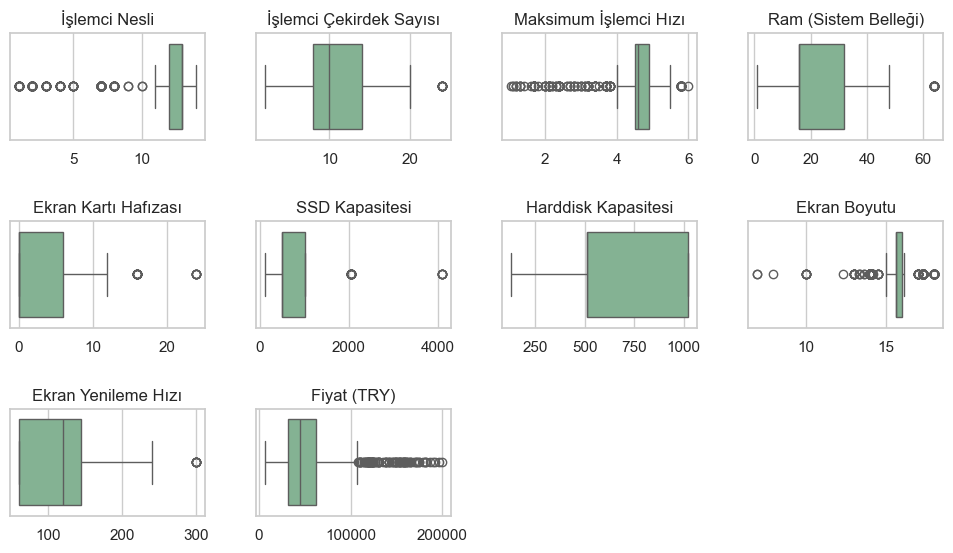

In [7]:
#Sayisal kolonlardaki aykiri degerleri gozlemleyelim
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Grid boyutu
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Grafik alanını oluştur
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 2 * n_rows))
axes = axes.flatten()  # Kolay erişim için düzleştir

# Her sütun için boxplot çiz
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")  

# Boş kalan subplotları kaldır
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

### Trendyol Verisinde Sayısal Değişkenler ile Fiyat İlişkilerinin Görselleştirilmesi

Bu bölümde Trendyol veri setindeki cihazların fiyatları ile çeşitli teknik özellikleri arasındaki ilişkiler, birden fazla grafiğin aynı düzen içerisinde sunulduğu **2x2 grid** yapısı kullanılarak görselleştirilmiştir. Böylece farklı değişkenlerin fiyata etkisi tek bir bakışta karşılaştırılabilir hale getirilmiştir.

Yapılan analizler şunları kapsamaktadır:

- `Markaya Göre Fiyat Dağılımı (Boxplot):`  
  Veri setinde en sık geçen ilk 8 marka seçilmiş, bu markalara ait fiyatların dağılımı incelenmiştir. Bu grafik, markalar arasındaki fiyat farklılıklarını, medyan seviyelerini ve aykırı değerleri görmeyi sağlar.

- `Ekran Kartı Tipine Göre Ortalama Fiyat (Barplot):`
  "Dahili", "Harici" gibi ekran kartı tiplerinin ortalama fiyat üzerindeki etkisi karşılaştırılmıştır. Harici ekran kartına sahip modellerin daha yüksek fiyat eğilimi gösterdiği gözlemlenebilir.

- `İşlemci Nesline Göre Ortalama Fiyat (Lineplot):`
  Sayısal forma dönüştürülmüş işlemci nesli değişkeni kullanılarak her neslin ortalama fiyatı hesaplanmış ve çizgi grafiği ile gösterilmiştir. Daha yeni nesil işlemcilerin fiyatları yukarı çekme eğiliminde olduğu görülebilir.

- `RAM Kapasitesi Dağılımı (Histogram):` 
  RAM değerlerinin frekans dağılımı incelenmiş; özellikle 8 GB, 16 GB ve 32 GB segmentlerinin yoğun olduğu, 64 GB ve üzerinin daha az bulunduğu belirlenmiştir.

Bu grid yapısı, ürün fiyatlarını etkileyebilecek temel donanımsal özelliklerin hızlı ve okunabilir şekilde karşılaştırılmasını sağlamaktadır. Görselleştirme sürecinde seaborn'un modern sürümleriyle uyumlu olacak şekilde gerekli parametre güncellemeleri yapılmış, uyarı veren eski kullanım biçimleri kaldırılmıştır.

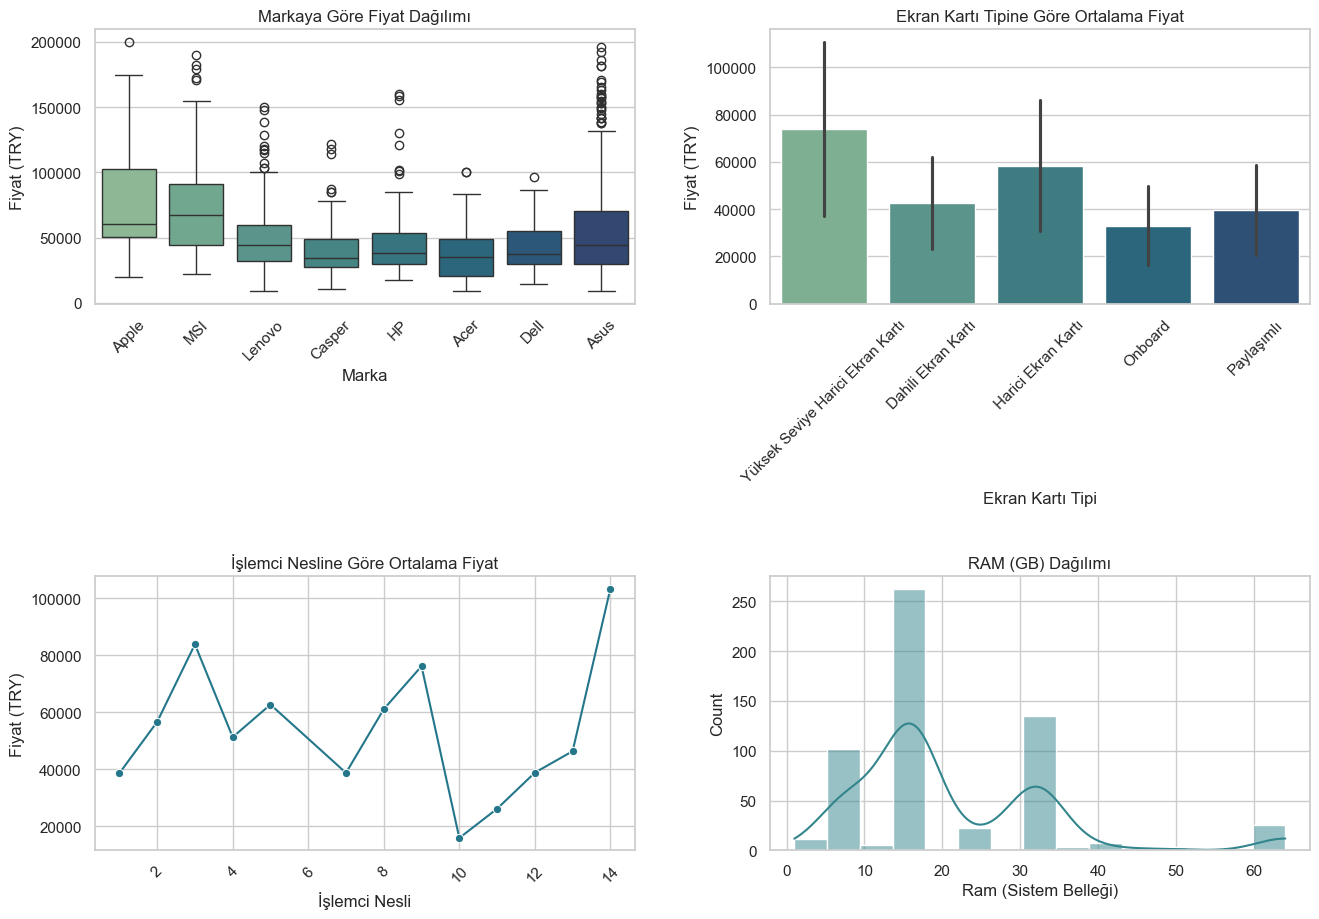

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# 1. Grafik: Marka'ya Göre Fiyat Dağılımı (Boxplot)
top_brands = df['Marka'].value_counts().head(8).index
sns.boxplot(
    data=df[df['Marka'].isin(top_brands)],
    x='Marka',
    y='Fiyat (TRY)',
    hue='Marka',  # renk için gerekli
    palette="crest",
    legend=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Markaya Göre Fiyat Dağılımı')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Grafik: Ekran Kartı Tipine Göre Ortalama Fiyat (Barplot)
sns.barplot(
    data=df,
    x='Ekran Kartı Tipi',
    y='Fiyat (TRY)',
    errorbar='sd',
    hue='Ekran Kartı Tipi',
    palette="crest",
    legend=False,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Ekran Kartı Tipine Göre Ortalama Fiyat')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Grafik: İşlemci Nesline Göre Ortalama Fiyat (Lineplot)
sns.lineplot(
    data=df[df['İşlemci Nesli'].notna()],
    x='İşlemci Nesli',
    y='Fiyat (TRY)',
    estimator='mean',
    errorbar=None,
    marker='o',
    color=palette(0.6),
    ax=axes[1, 0]
)
axes[1, 0].set_title('İşlemci Nesline Göre Ortalama Fiyat')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Grafik: RAM Dağılımı (Histogram)
sns.histplot(
    data=df,
    x='Ram (Sistem Belleği)',
    bins=15,
    kde=True,
    color=palette(0.5),
    ax=axes[1, 1]
)
axes[1, 1].set_title('RAM (GB) Dağılımı')

plt.tight_layout(pad=3.0)
plt.show()

### Sayısal Değişkenler ile Fiyat Arasındaki İlişkinin İncelenmesi

Bu bölümde, çeşitli sayısal donanım özellikleri ile `Fiyat (TRY)` değişkeni arasındaki ilişkiler `scatterplot` (dağılım grafiği) kullanılarak görselleştirilmiştir.

İncelenen değişkenler:

- İşlemci Nesli
- İşlemci Çekirdek Sayısı  
- Maksimum İşlemci Hızı (GHz)  
- RAM (GB)  
- Ekran Kartı Hafızası (GB)  
- SSD Kapasitesi (GB)  
- Hard Disk Kapasitesi(GB)
- Ekran Boyutu (inç)  
- Ekran Yenileme Hızı (Hz)  

**Scatterplot (Dağılım Grafiği):**

- X ekseninde donanım özelliği, Y ekseninde fiyat yer alır.
- Her bir nokta bir ürünü temsil eder.
- Noktaların yoğunluğu, saçılım yönü ve kümelenmeleri değişkenler arası ilişkinin gücü hakkında fikir verir.

Bu görselleştirmeler sayesinde, örneğin RAM miktarı arttıkça fiyat da artıyor mu, daha yüksek ekran yenileme hızları fiyatı etkiliyor mu gibi sorulara görsel olarak yanıt aranmaktadır.

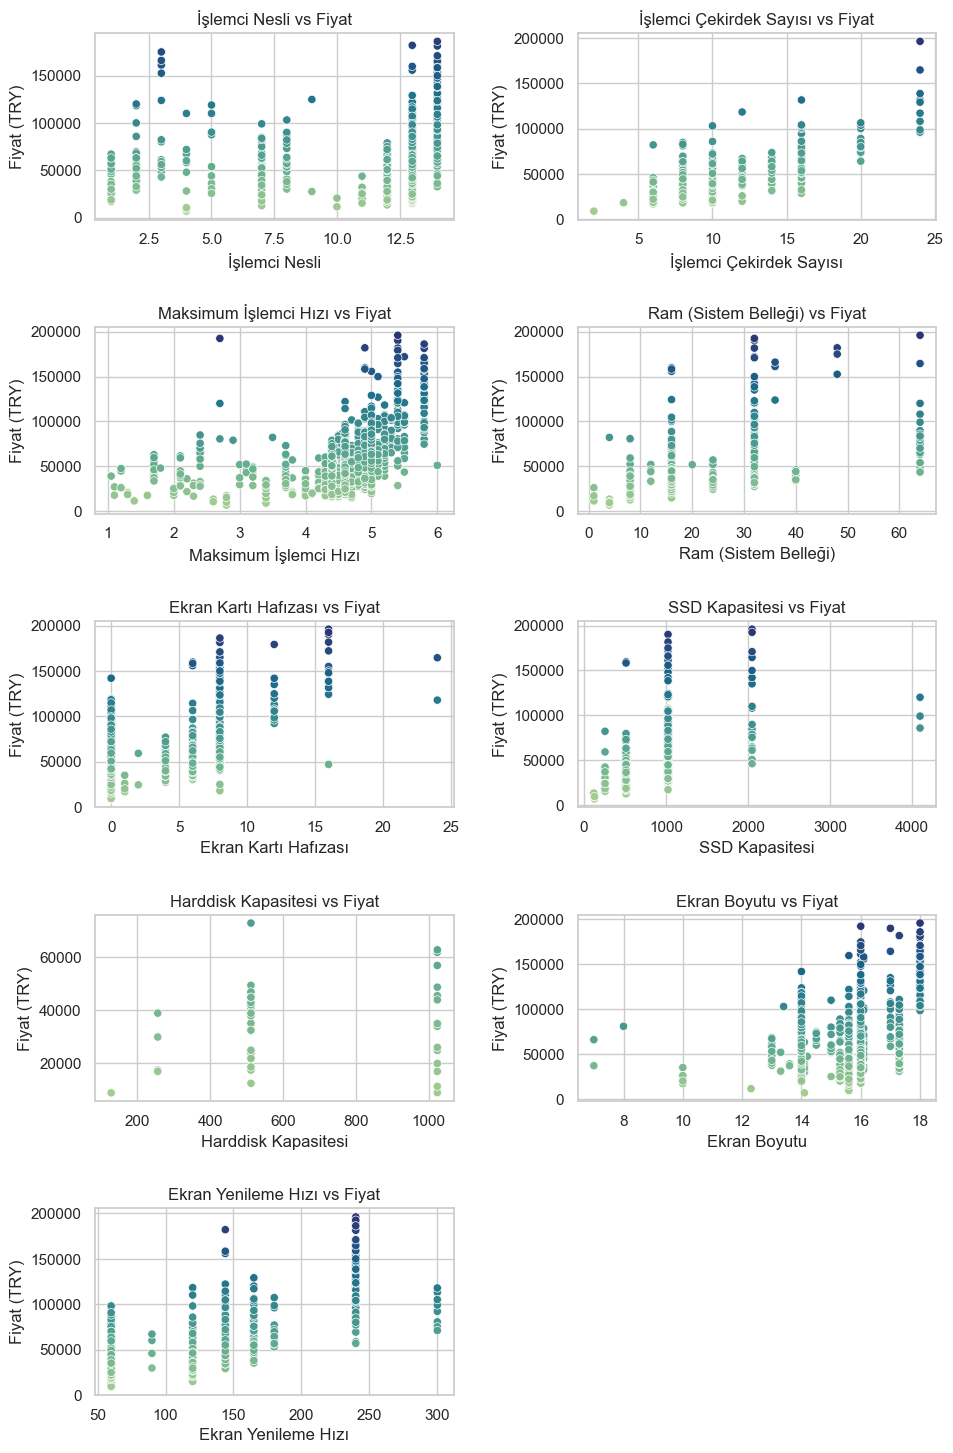

In [15]:
#numerical kolonlar ile Fiyat (TRY) arasindaki iliskiyi gozlemleyelim
# İncelenecek sayısal sütunlar
features = df.select_dtypes(include='number').columns.tolist()
features.remove('Fiyat (TRY)')  # Hedef değişkeni çıkar

n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols  # Satır sayısı hesaplanıyor

# Grid yapısı oluşturuluyor
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3* n_rows))
axes = axes.flatten()  # Kolay indeksleme için düzleştirme

# Her scatterplot için döngü
for i, feature in enumerate(features):
    sns.scatterplot(
        data=df,
        x=feature,
        y='Fiyat (TRY)',
        ax=axes[i],
        hue=df['Fiyat (TRY)'],
        palette=palette,
        legend=False
    )
    axes[i].set_title(f'{feature} vs Fiyat')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fiyat (TRY)')

# Boş kalan subplot'lar varsa sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

### Sayısal Değişkenler Arasındaki Korelasyonun İncelenmesi

Bu bölümde, veri setindeki tüm sayısal sütunlar arasındaki ilişkiler `corr()` fonksiyonu kullanılarak hesaplanmış ve sonuçlar bir korelasyon matrisi şeklinde `heatmap` (ısı haritası) ile görselleştirilmiştir.

**Korelasyon (Correlation):**

- +1: Pozitif yönlü güçlü ilişki  
- -1: Negatif yönlü güçlü ilişki  
- 0: İlişki yok  

Isı haritasında `annot=True` parametresi sayesinde her hücrede ilgili korelasyon katsayısı sayısal olarak gösterilmiştir. Görselleştirme, özellikle **Fiyat (TRY)** değişkeni ile diğer sayısal değişkenler (örneğin RAM, SSD, işlemci hızı) arasındaki ilişkiyi incelemek için kullanılır.

Bu analiz, hangi değişkenlerin fiyatla daha güçlü ilişki içinde olduğunu belirleyerek modelleme sürecinde hangi özelliklerin daha açıklayıcı olduğunu saptamaya yardımcı olur.

<Axes: >

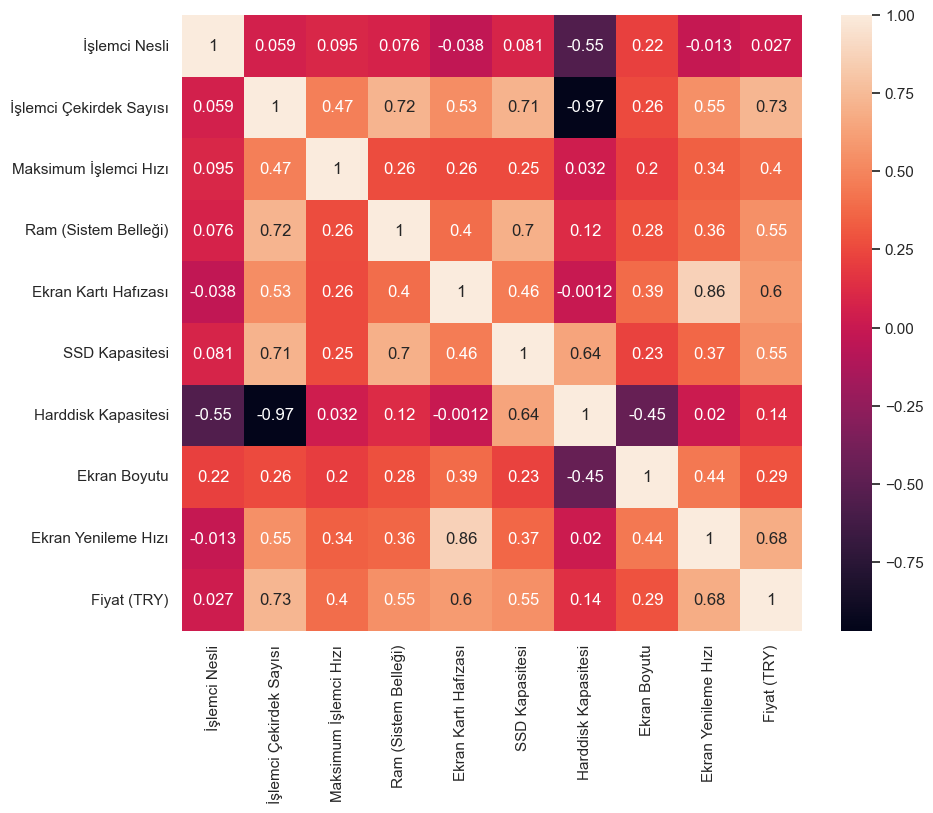

In [10]:
#numerical kolonlar arasindaki iliskiyi gozlemleyelim ve fiyat ile iliskili olanlari belirleyelim
df_corr = df.select_dtypes(include='number').corr() 
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot = True)

### Fiyat Dağılımının İncelenmesi ve Log Dönüşümü

Bu bölümde, `Fiyat (TRY)` değişkeninin dağılımı iki farklı şekilde görselleştirilmiştir:

1. **Orijinal Dağılım (Linear)**  
   `sns.displot()` fonksiyonu ile ürün fiyatlarının ham (log alınmamış) hali görselleştirilmiştir. Fiyat dağılımı genellikle sağa çarpık olup, bazı ürünler aşırı yüksek fiyatlara sahip olabilir.

2. **Log Dönüşümü Sonrası Dağılım**  
   `np.log()` ile logaritmik dönüşüm uygulanarak fiyatların daha normal (simetrik) bir dağılıma sahip olup olmadığı gözlemlenmiştir. Bu dönüşüm, özellikle aykırı değerlerin etkisini azaltmak ve modelleme aşamasında daha dengeli sonuçlar elde etmek için faydalıdır.

Bu analiz sonucunda, fiyat değişkeninin yapısı ve modellemeye uygunluğu hakkında önemli bilgiler elde edilir.

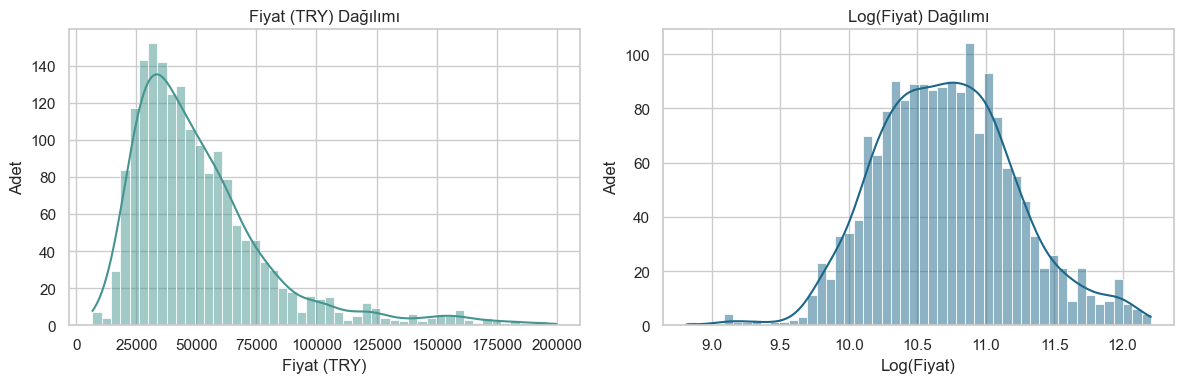

In [16]:
# NaN ve sıfır değerleri filtrele (log için gerekli)
log_prices = df['Fiyat (TRY)'][df['Fiyat (TRY)'] > 0].dropna()

# Renk paleti
palette = sns.color_palette("crest", as_cmap=True)

# Grid yapı: 1 satır, 2 sütun
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Orijinal fiyat dağılımı
sns.histplot(
    df['Fiyat (TRY)'],
    bins=50,
    kde=True,
    ax=axes[0],
    color=palette(0.4)
)
axes[0].set_title('Fiyat (TRY) Dağılımı')
axes[0].set_xlabel('Fiyat (TRY)')
axes[0].set_ylabel('Adet')

# Log dönüşümlü fiyat dağılımı
sns.histplot(
    np.log(log_prices),
    bins=50,
    kde=True,
    ax=axes[1],
    color=palette(0.7)
)
axes[1].set_title('Log(Fiyat) Dağılımı')
axes[1].set_xlabel('Log(Fiyat)')
axes[1].set_ylabel('Adet')

plt.tight_layout()
plt.show()

In [12]:
df['SSD Kapasitesi'].unique()


array([  nan,  512., 1024.,  128., 2048., 4096.,  250.,  500.,  256.,
        120.])